In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import numpy as np

In [46]:
def timeplot(data):
    fig, axes = plt.subplots(1, 1, figsize = (5,5))
    ax = sns.lineplot(x=data.index, y=data.values)
    ax.set(xlabel= 'Anos', ylabel='força de trabalho' , title = data.name)

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposição(data):
    fig, axes = plt.subplots(4, 1, figsize = (13,10))
    decomp = seasonal_decompose(data, model="additive", period = 1) 
    sns.lineplot(x=data.index, y=data.values, ax=axes.reshape(-1)[0]).set(title = data.name)
    sns.lineplot(x=data.index, y=decomp.trend , ax=axes.reshape(-1)[1])
    sns.lineplot(x=data.index, y=decomp.seasonal , ax=axes.reshape(-1)[2])
    sns.lineplot(x=data.index, y=decomp.resid , ax=axes.reshape(-1)[3])

In [48]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', str)

a1d = pd.read_excel(r"C:\Users\joao\Desktop\tcc\dados\a1dfinal.xlsx")
a1p = pd.read_excel(r"C:\Users\joao\Desktop\tcc\dados\a1pfinal.xlsx")

In [49]:
a1p.index = a1p['ind'].values
a1p = a1p.drop(['ind'] , axis = 1)
a1d.index = a1d['ind'].values
a1d = a1d.drop(['ind'] , axis = 1)

Esse trabalho é um começo de investigação entre a relação de postos de trabalho por área nos estados unidos e investimento em inteligencia artificial também nos estados unidos

Para esse Trabalho foi somado dois conjuntos de dados de organizações difentes, o primeiro conjunto de dados se refere aos postos de trabalho nos estados unidos e o segundo ao investimento em ia nos estados unidos

a serie original dos dados referentes aos postos de trabalho nos estados unidos se chama "Occupation by Sex for the Civilian Employed Population 16 Years and Over"
e o link para os dados é:
https://data.census.gov/table/ACSST5Y2019.S2401?q=+Employment+and+Labor+Force+Status+by+ocupation

O Departamento do Censo dos Estados Unidos (DCEU), oficialmente Bureau of the Census, é a principal agência governamental do sistema estatístico federal do país ... (wikipedia)

a serie original dos dados referentes ao investimento privado em IA se chama "Annual private investment in artificial intelligence"
o link para os dados é https://ourworldindata.org/artificial-intelligence

a fonte dos dados é referente a:
NetBase Quid (2022) via AI Index 2023 Annual Report, AI Index Steering Committee, Institute for Human-Centered AI, Stanford University, Stanford, CA, April 2023

# Conclusão final:

Se houver indícios de anormalidade entre o investimento em IA em 2021 e a quantidade de pessoas no mercado de trabalho em geral, essa anormalidade pode ser devido aos ganhos imediatos devido a descoberta em determinadas áreas do mercado de trabalho. Como algumas áreas forem esvaziadas devido a pandemia, o lucro economico (considerando o custo de oportunidade) é maior. Já que devido a impossibilidade de algumas pessoas ocuparem dada função devido a pandemia, uma tecnologia que substituisse essa mão-de-obra iria dar lucros economicos maiores que considerando um cenário onde já havia ocupação de mão-de-obra. Ou seja, o lucro economico considerando o cenário de impossibilidade de ocupação em algumas áreas seria maior. Há um grande ganho se alguma tecnologia nesse sentido fosse descoberta.

A tabela de uso tem a seguinte estrutura:

In [50]:
a1p

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2018d2017,2019d2018,2020d2019,2021d2020,2022d2021,2021d2019
Civilian employed population 16 years and over labol force,139033928.0,140399548.0,142921687.0,145128676.0,148019908.0,150534773.0,152571041.0,155058331,156783165,158758794,157569613.5,156380433,162590221,1.011123775090808,1.012601027667735,0.9925095141501263,0.99245298332854,1.039709494857327,0.9850190283002528
"Management, business, science, and arts occupations: labol force",49975620.0,50508936.0,51543472.0,52753573.0,54622492.0,55873365.0,57331293.0,59160458,60488289,63267357,64634384.5,66001412,69122191,1.022444569310129,1.045943901636894,1.021607153591069,1.021150158860103,1.047283518722296,1.043214307182138
"Management, business, and financial occupations: labol force",19970732.0,20102895.0,20504312.0,21201006.0,21946506.0,22657853.0,23130538.0,24009493,24450164,25587202,26332535.0,27077868,28675339,1.018354031882306,1.046504309746143,1.029129132603088,1.028304642906579,1.058995449715613,1.058258265206176
Management occupations labol force,13446602.0,13432833.0,13736728.0,14257292.0,14846834.0,15436375.0,15703814.0,16332467,15917316,17049444,17392946.0,17736448,18850086,0.9745812436051455,1.071125559108081,1.020147401874219,1.019749500745877,1.062788107291832,1.040294803748439
Business and financial operations occupations labol force,6524130.0,6670062.0,6767584.0,6943714.0,7099672.0,7221478.0,7426724.0,7677026,8532848,8537758,8939589.0,9341420,9825253,1.111478325070151,1.000575423352203,1.047065166288386,1.044949605625046,1.051794373874636,1.094130332576772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retail AI invest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,827400007,1330376349,1194640069,2139310867.0,3276723875,1410866709,1.607899852241601,0.8979715175318409,1.790757670459486,1.531672617357859,0.4305723530030433,2.742854488166343
Sales enablement AI invest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762046941,1212903127,1163191612,1504536420.0,2647310868,1039963332,1.591638338457683,0.9590144390814156,1.293455355487897,1.75955253246711,0.3928376317911146,2.275902646381876
Semiconductors AI invest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126773916,337907765,241891093,576267636.0,156558789,536568891,2.665436042852853,0.7158494656078709,2.382343346557204,0.271677219436977,3.427267765848649,0.6472284161368439
Total AI invest,NaN,NaN,NaN,4211473455.0,7963110307.0,10632656532.0,11464247704.0,15548790772,22716597215,30795184157,35531472847.0,73395940859,43848726664,1.460988031037607,1.355624870465442,1.153799654707485,2.065659962226896,0.5974271349452039,2.383357751160468


As variáveis da tabela são apresentadas no resultado abaixo:

quando a variável acabar com labor force é porque se refere a força de trabalho

quando acabar com AI invest se refere ao investimento em IA

In [51]:
a1d.index

Index(['Civilian employed population 16 years and over labol force',
       'Management, business, science, and arts occupations: labol force',
       'Management, business, and financial occupations: labol force',
       'Management occupations labol force',
       'Business and financial operations occupations labol force',
       'Computer, engineering, and science occupations: labol force',
       'Computer and mathematical occupations labol force',
       'Architecture and engineering occupations labol force',
       'Life, physical, and social science occupations labol force',
       'Education, legal, community service, arts, and media occupations: labol force',
       'Community and social service occupations labol force',
       'Legal occupations labol force',
       'Educational instruction, and library occupations labol force',
       'Arts, design, entertainment, sports, and media occupations labol force',
       'Healthcare practitioners and technical occupations: labol f

As colunas são referentes ao valor de cada ano e são apresentadas abaixo:

algumas observações:

os dados de força de trabalho de 2020 estavam ausente, para preenchimento foi utilizado a formula (2021+2019/2)

os dados especificos de investimento em IA por área estavam disponiveis a partir de 2017

os dados totais de investimento em IA estavam disponíveis a partir de 2013

In [52]:
a1d.columns

Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       'ind.1'],
      dtype='object')

Como o intuito desse trabalho é focado na investigação dos dados, a estética da apresentação pode ficar comprometida, peço perdão pelo vacilo. Mas todos resultados serão explicados

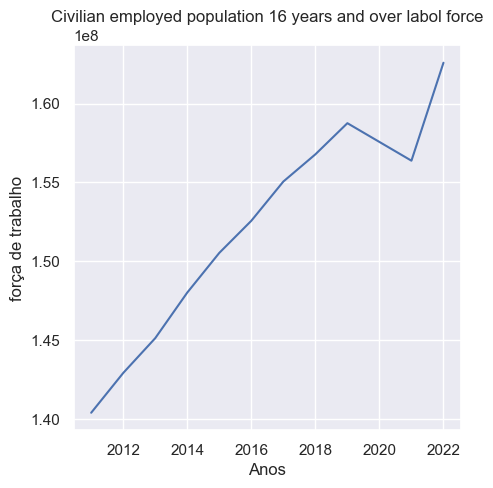

In [53]:
timeplot(a1p.iloc[0,[1,2,3,4,5,6,7,8,9,10,11,12]])

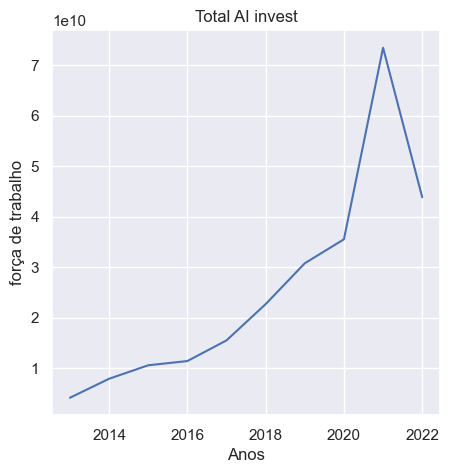

In [54]:
timeplot(a1p.iloc[-2,[3,4,5,6,7,8,9,10,11,12]])

O primeiro gráfico (que se referece ao total de pessoas empregas a partir dos 16 anos nos estados unidos) mostra um decaimento em 2021, provavelmente relacionado a pandemia.

O segundo gráfico, de investimento total em IA, mostra um aumento no total privado em IA investidos em 2021.

Algumas Hipóteses

Devido a ausência de mão-de-obra em alguns setores, uma tecnologia que substituise essa mão-de-obra faltante consegueria gerar um valor em produção muito grande.

Alguns setores da economia conseguem ser substituidos quase de maneira imediata por uma tecnologia que automatize esses setores, como o setor de vendas, telemarketing. Então uma descoberta de automatização nesses setores poderia ser implementada rapidamente

A flexibilização do mercado de trabalho dos Estados Unidos permite uma substituição mais veloz do trabalhador por um processo de automatização da tarefa daquele trabalhador

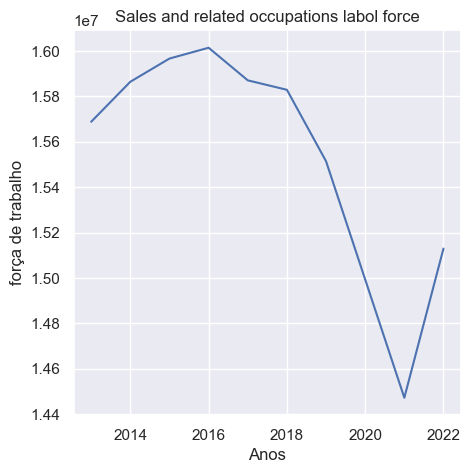

In [55]:
timeplot(a1p.iloc[26,[3,4,5,6,7,8,9,10,11,12]])

# Segundo o site do governo dos EUA:

41-0000 Sales and Related Occupations 

First-Line Supervisors of Non-Retail Sales Workers; First-Line Supervisors of Retail Sales Workers; Gambling Change Persons and Booth Cashiers; Cashiers; Parts Salespersons; Counter and Rental Clerks; Retail Salespersons; Advertising Sales Agents; Insurance Sales Agents; Securities, Commodities, and Financial Services Sales Agents; Travel Agents; Sales Representatives of Services, Except Advertising, Insurance, Financial Services, and Travel; Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products; Sales Representatives, Wholesale and Manufacturing, Except Technical and Scientific Products; Models; Demonstrators and Product Promoters; Real Estate Brokers; Real Estate Sales Agents; Sales Engineers; Telemarketers; Sales and Related Workers, All Other; Door-to-Door Sales Workers, News and Street Vendors, and Related Workers

para o portugues:

Supervisores de primeira linha de trabalhadores de vendas não varejistas; Supervisores de Primeira Linha de Trabalhadores de Vendas no Varejo; Pessoas que mudam de jogo e caixas de cabine; Caixas; Vendedores de peças; Balconistas e Aluguéis; Vendedores de Varejo; Agentes de vendas de publicidade; Agentes de Vendas de Seguros; Agentes de Vendas de Valores Mobiliários, Mercadorias e Serviços Financeiros; Agentes de viagem; Representantes Comerciais de Serviços, Exceto Publicidade, Seguros, Serviços Financeiros e Viagens; Representantes de Vendas, Atacado e Fabricação de Produtos Técnicos e Científicos; Representantes Comerciais, Atacado e Manufatura, Exceto Produtos Técnicos e Científicos; Modelos; Demonstradores e Promotores de Produtos; Corretores de Imóveis; Agentes de Vendas Imobiliárias; Engenheiros de Vendas; Operadores de telemarketing; Vendas e Trabalhadores Relacionados, Todos os Outros; Vendedores porta a porta, vendedores de notícias e ambulantes e trabalhadores relacionados

No gráfico que se refere a Sales and Related Occupations, nota-se uma queda nos postos de trabalho em 2021. Essa queda pode estar ligada a pandemia que aconteceu. Se os cargos relacionados a essa área economica forem de fácil substituição, isso pode explicar o aumento do gasto em IA para ganhar mercado por parte dos investidores privados em IA

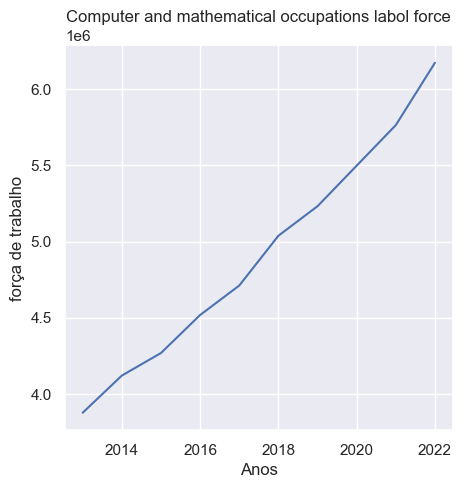

In [56]:
timeplot(a1p.iloc[6,[3,4,5,6,7,8,9,10,11,12]])

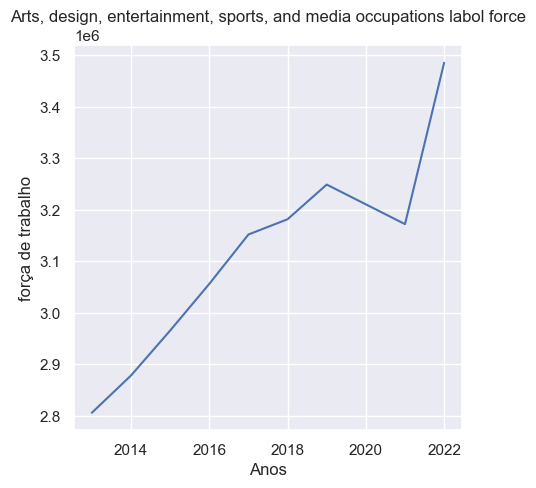

In [57]:
timeplot(a1p.iloc[13,[3,4,5,6,7,8,9,10,11,12]])

O gráfico relacionado as funções de computação e matematicos parece não sofrer alteração devido a pandemia

Já o gráfico em relação a Arts, design... etc parece sofrer uma queda durante a pandemia

Hipótese:

O efeito do aumento em investimento em IA compensou a queda natural de postos de trabalhos em relação a área de matematica e computação, já que o investimento privado em IA é feito por os ocupantes dessa área

In [58]:
pd.DataFrame(a1p.iloc[36:,:][['2021d2020', '2022d2021',]]).sort_values(by='2021d2020', ascending=False)

,2021d2020,2022d2021
Entertainment AI invest,21.52344292252904,0.1355867852753342
Venture capital AI invest,13.32999052867076,0.0
Drones AI invest,4.990954339160658,3.577806795621922
"Natural Language Processing, customer support AI invest",3.500147932098442,0.4449900007163286
Financial technology AI invest,3.329698965029488,0.5742841864875942
Fitness and wellness AI invest,3.007767972419121,0.3429394407081397
Insurance technology AI invest,2.366239552691904,0.175598206554431
Human Resources technology AI invest,2.262936378430287,0.5556791632287075
Marketing and digital ads AI invest,2.115207133129119,0.9865888824359121
Total AI invest,2.065659962226896,0.5974271349452039


A tabela em cima, na primeira coluna é a área de investimento em IA
A os valores da segunda coluna e da terceira foram calculados da seguinte maneira:
Investimento naquela área em IA , por exemplo, em 2021 dividido pelo total investido em 2020, por exemplo.
Então a primeira coluna (2021d2020) é o valor de investimento privado naquela área em 2021 dividido pelo valor em 2020

Algumas coisas que podem ser notadas na tabela:

Houve um grande aumento em Investimento em IA na maioria das áreas em 2021 em relação a 2020

Houve uma diminuição em Investimento em IA em muitas áreas em 2022 em relação a 2021

Hipóteses:

Devido a retomada de alguns trabalhadores a seus postos de trabalho, os ganhos em descoberta de alguma tecnologia de substituição da mão-de-obra desses trabalhadores se tornam menores. Assim as empresas possuem menos incentivos para o investimento privado em IA.

Então áreas como Entertainment AI invest que teve (21.523442922529036) vezes mais investimento em relação ao ano passado, Venture capital AI invest(13.329990528670763), possuem maior incentivos para sua pesquisa, já que sua implementação pode ser feita imediatamente 

e áreas como Industrial automation AI invest (0.8194539335901512) , Energy, oil and gas AI invest (0.630210906607394) que demandam mais tempo para o retorno, receberiam menos investimento naquele ano

In [59]:
pd.DataFrame(a1p.iloc[:36,:][['2021d2019', '2022d2021',]]).sort_values(by='2021d2019', ascending=False)

,2021d2019,2022d2021
"Life, physical, and social science occupations labol force",1.10314219499268,1.025440790146672
Computer and mathematical occupations labol force,1.101829464322235,1.071048386579161
Business and financial operations occupations labol force,1.094130332576772,1.051794373874636
"Computer, engineering, and science occupations: labol force",1.093892497745965,1.055312532743435
Architecture and engineering occupations labol force,1.076554323083599,1.045182246289901
Legal occupations labol force,1.070774058878891,1.013645866925622
Material moving occupations labol force,1.068302471323273,1.017472363333298
"Management, business, and financial occupations: labol force",1.058258265206176,1.058995449715613
Health diagnosing and treating practitioners and other technical occupations labol force,1.045560873475945,1.034015000965289
"Management, business, science, and arts occupations: labol force",1.043214307182138,1.047283518722296


A tabela acima segue o mesmo esquema que a anterior a ela, mas referentes a mão-de-obra

Se usou os valores de 2021 dividido por 2019 pela ausência de dados de mão-de-obra de 2020

Primeiramente, em relação a 2021/2019 (primeira coluna), nota-se que houve uma queda de número de trabalhadores em 2021 em relação a 2019, Civilian employed population 16 years and over labol force (0.9850190283002528). 

Mas ao mesmo tempo, é possível notar um aumento grande no valor da relação dos cargos de 2021 para 2019:

Life, physical, and social science occupations labol force (1.10314219499268)
Computer and mathematical occupations labol force (1.1018294643222346)
Business and financial operations occupations labol force (1.0941303325767724)
Computer, engineering, and science occupations: labol force (1.0938924977459648)

Enquanto nos valores de 2022/2021 Civilian employed population 16 years and over labol force (1.0397094948573267)

Life, physical, and social science occupations labol force (1.0254407901466724)
Computer and mathematical occupations labol force (1.0710483865791613)
Business and financial operations occupations labol force (1.0517943738746358)
Computer, engineering, and science occupations: labol force (1.0553125327434345)

Os valores referentes a 2022, parecem estar mais próxima do agregado geral (1.0397094948573267).

Então os valores referentes a 2021/2019 indicam uma maior anormalidade em relação ao crescimento natural da economia. Enquanto os valores de 2022/2021 parecem indicar que o aumento nesses cargos tem relação com o crescimento natural da economia

Os gráficos abaixo são apresentados em termos de primeira diferença, por ser uma série temporal achei apropriado tirar a primeira diferença para reduzir a correlação serial.

Lembrando que os dados de força de trabalho referentes a 2020 são estimados com as séries, o que perde força de demonstração

In [60]:
def timeplotpd(data):
    fig, axes = plt.subplots(1, 1, figsize = (5,5))
    ax = sns.lineplot(x=data.index, y=data.values)
    ax.set(xlabel= 'Anos', ylabel='força de trabalho' , title = data.name + str(' primeira diferença'))

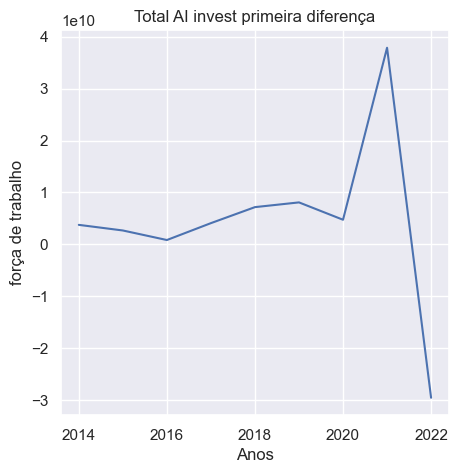

In [61]:
timeplotpd(a1d.iloc[:,[3,4,5,6,7,8,9,10,11]].iloc[-2,:])

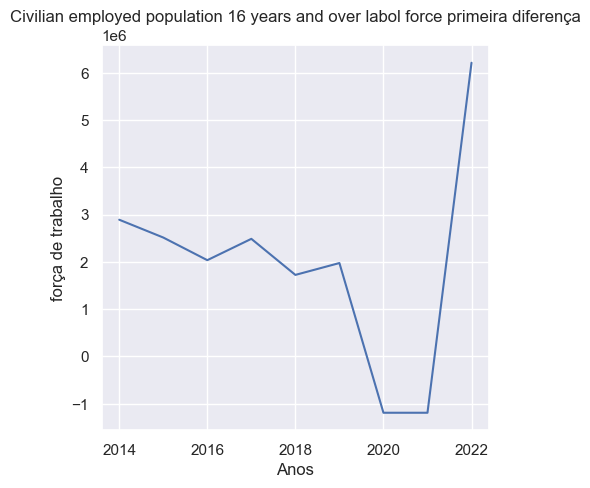

In [62]:
timeplotpd(a1d.iloc[:,[3,4,5,6,7,8,9,10,11]].iloc[0,:])

Em termos de primeira diferença, parece haver algo anormal em 2021, tanto no total de gastos investidos em IA (primeiro gráfico), e totalidade do mercado de trabalho (segundo gráfico). O gráfico parece mostrar uma força contrária, pelo menos para esse ano em especifico

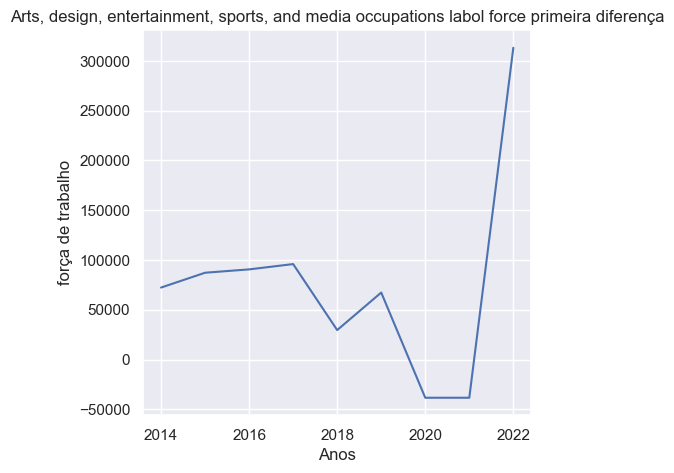

In [63]:
timeplotpd(a1d.iloc[:,[3,4,5,6,7,8,9,10,11]].iloc[13,:])

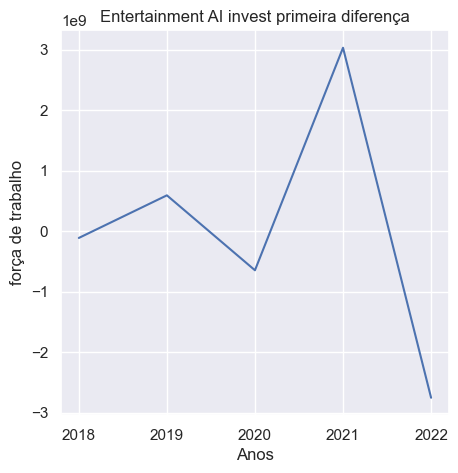

In [64]:
timeplotpd(a1d.iloc[44,7:-1])

Esse anormalidade parece ser presente quando especificados para a parte de entretenimento também, o que contribui para a hipótese de ganhos a curto prazo pela implementação de IA.

Mas também esse fato pode ser devido a correlação de investimento que a pesquisa nessa área possibilita.

por exemplo: Quando superada certa barreira, ou quando descoberta certa maneira de uso de IA, como por exemplo, o uso para criação de imagem, pode haver um salto de investimento nessa área devido a nova possibilidade de uso dessa descoberta.

In [65]:
pd.DataFrame((a1d.iloc[:,[3,4,5,6,7,8,9,10,11]][~(a1d.iloc[:,[3,4,5,6,7,8,9,10,11]][2014].isnull())].T.corr()).iloc[-1,:]).sort_values(by='Total AI invest', ascending=False)

,Total AI invest
Total AI invest,1.0
Law enforcement workers including supervisors labol force,0.40689241342240867
Legal occupations labol force,0.3271158365143681
"Life, physical, and social science occupations labol force",0.29579364674125214
Material moving occupations labol force,0.09682385675081354
Healthcare support occupations labol force,0.011477348753343625
Architecture and engineering occupations labol force,-0.010509248683677502
Business and financial operations occupations labol force,-0.04631572403421125
"Computer, engineering, and science occupations: labol force",-0.11395444669505084
"Installation, maintenance, and repair occupations labol force",-0.13379785755330317


A tabela acima mostra a correlação entre o gasto total em AI com a o número de pessoas por área de trabalho, ambas em primeira diferença

Por haver poucos dados, os resultados podem não ser significativos.

Por haver uma anormalidade em 2021, essa anormalidade pode ser a maior responsável pelos valores apresentados

Mas para além do que foi dito, nota-se que as menores correlações são:

Arts, design, entertainment, sports, and media occupations labol force 	(-0.8653524956087698)
Civilian employed population 16 years and over labol force (-0.839606454127225) que é o número total de empregados
Sales and related occupations labol force (-0.8234428972142355)

Enquanto algumas das mais positivas:

Life, physical, and social science occupations labol force 	(0.29579364674125214)
Computer, engineering, and science occupations: labol force 	(-0.11395444669505084)

Sinceramente, nessa apresentação das correlações em cima não sei dizer se existe alguma conclusão mais segura, se eu fosse tirar alguma conclusão seria que o ano de 2021 puxou a correlação para o seu valor respectivo em 2021.

Então seria mais eficiente investigar a anormalidade em 2021.

Conclusão final:

Se houver indícios de anormalidade entre o investimento em IA em 2021 e a quantidade de pessoas no mercado de trabalho em geral, essa anormalidade pode ser devido aos ganhos imediatos devido a descoberta em determinadas áreas do mercado de trabalho. Como algumas áreas forem esvaziadas devido a pandemia, o lucro economico (considerando o custo de oportunidade) é maior. Já que devido a impossibilidade de algumas pessoas ocuparem dada função devido a pandemia, uma tecnologia que substituisse essa mão-de-obra iria dar lucros economicos maiores que considerando um cenário onde já havia ocupação de mão-de-obra. Ou seja, o lucro economico considerando o cenário de impossibilidade de ocupação em algumas áreas seria maior. Há um grande ganho se alguma tecnologia nesse sentido fosse descoberta.